In [1]:
from os import listdir
from os.path import isfile, join

import seaborn as sns
import matplotlib.pyplot as plt
from utils.rodents_routine import params_to_J_scalar, params_to_P_scalar, params_to_w_scalar, params_to_heter_scalar

import pandas as pd

In [2]:
plt.rcParams.update({'font.size': 22})
sns.set(font_scale=2.4)

In [3]:
path = r"/Users/paopao_ch/Documents/projects/v1_modelling/results/actual_data/method_validation_actual_data_gd"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [4]:
data = []
lowest_loss = 10000
lowest_file = ""
for file in files:
    with open(f"{path}/{file}", 'r') as f:
        count = 0
        for line in f:
            if line[0] == '[':
                if count == 0:
                    J_array = eval(line.strip())
                    count += 1
                elif count == 1:
                    P_array = eval(line.strip())
                    count +=1
                else:
                    w_array = eval(line.strip())
                    count = 0
            if line[:5] == "loss:":
                loss = float(line.strip().split(' ')[-1])
                if loss < lowest_loss:
                    lowest_loss = loss
                    lowest_file = file
            if line[:9] == "heter_ff:":
                heter_ff = eval(line.strip().split(' ')[-1])[0]
        datum = {"$J_{EE}$": params_to_J_scalar(J_array[0]) / (800 ** 0.5), 
                 "$J_{EI}$": params_to_J_scalar(J_array[1]) / (200 ** 0.5), 
                 "$J_{IE}$": params_to_J_scalar(J_array[2]) / (800 ** 0.5),
                 "$J_{II}$": params_to_J_scalar(J_array[3]) / (200 ** 0.5),
                 "$P_{EE}$": params_to_P_scalar(P_array[0]),
                 "$P_{EI}$": params_to_P_scalar(P_array[1]),
                 "$P_{IE}$": params_to_P_scalar(P_array[2]),
                 "$P_{II}$": params_to_P_scalar(P_array[3]),
                 "$w_{EE}$": params_to_w_scalar(w_array[0]),
                 "$w_{EI}$": params_to_w_scalar(w_array[1]),
                 "$w_{IE}$": params_to_w_scalar(w_array[2]),
                 "$w_{II}$": params_to_w_scalar(w_array[3]),
                 "$q_{ff}$": params_to_heter_scalar(heter_ff),
                 "loss": loss}
        
        data.append(datum)

print(lowest_file)
print(lowest_loss)

log_method_val_1716344976.596711.log
0.9143538475036621


In [5]:
# Lowest
J_array = [params_to_J_scalar(-2.532346) / (800 ** 0.5), params_to_J_scalar(1.974416) / (200 ** 0.5), params_to_J_scalar(3.426216) / (800 ** 0.5), params_to_J_scalar(1.486577) / (200 ** 0.5) ]
P_array = [params_to_P_scalar(0.421029), params_to_P_scalar(3.715167), params_to_P_scalar(3.757823), params_to_P_scalar(4.414339), params_to_heter_scalar(2.696995)]
w_array = [params_to_w_scalar(0.456685), params_to_w_scalar(-3.001731), params_to_w_scalar(-1.995851), params_to_w_scalar(4.112084)]

In [6]:
df = pd.DataFrame(data)
print(len(df))
for datum in data[:5]:
    print(datum)
df.head()

49
{'$J_{EE}$': 0.019411004521964134, '$J_{EI}$': 0.6147108307033229, '$J_{IE}$': 1.041266622454641, '$J_{II}$': 1.6066647079254515, '$P_{EE}$': 0.05922214672977101, '$P_{EI}$': 0.5289127820478534, '$P_{IE}$': 0.5801326095927296, '$P_{II}$': 0.5540718435262794, '$w_{EE}$': 36.55085510514537, '$w_{EI}$': 177.55755928106655, '$w_{IE}$': 176.83404827808673, '$w_{II}$': 89.54586385441587, '$q_{ff}$': 0.839261834882743, 'loss': 0.9362863302230835}
{'$J_{EE}$': 0.1286968954513664, '$J_{EI}$': 0.3002302364811079, '$J_{IE}$': 0.5762626415656972, '$J_{II}$': 0.7607423840031763, '$P_{EE}$': 0.02531458681578585, '$P_{EI}$': 0.44524965426970237, '$P_{IE}$': 0.2855092853282661, '$P_{II}$': 0.5587575656543322, '$w_{EE}$': 9.735740463988574, '$w_{EI}$': 176.7486998934784, '$w_{IE}$': 35.363627404643424, '$w_{II}$': 121.75667136296295, '$q_{ff}$': 0.8240574895732626, 'loss': 0.9307103157043457}
{'$J_{EE}$': 0.055651343933816134, '$J_{EI}$': 0.04334659133114966, '$J_{IE}$': 0.13176983170390616, '$J_{II

,$J_{EE}$,$J_{EI}$,$J_{IE}$,$J_{II}$,$P_{EE}$,$P_{EI}$,$P_{IE}$,$P_{II}$,$w_{EE}$,$w_{EI}$,$w_{IE}$,$w_{II}$,$q_{ff}$,loss
0,0.019411,0.614711,1.041267,1.606665,0.059222,0.528913,0.580133,0.554072,36.550855,177.557559,176.834048,89.545864,0.839262,0.936286
1,0.128697,0.300230,0.576263,0.760742,0.025315,0.445250,0.285509,0.558758,9.735740,176.748700,35.363627,121.756671,0.824057,0.930710
2,0.055651,0.043347,0.131770,0.045586,0.029485,0.039192,0.085856,0.196915,145.325962,8.629790,168.546132,3.385725,0.669967,0.964874
3,1.393071,2.335447,1.250505,2.666268,0.002448,0.133075,0.351266,0.293013,123.990013,59.474130,19.115520,172.783332,0.818898,0.923336
4,0.020421,2.728778,1.274487,2.736003,0.043975,0.003026,0.580674,0.574217,81.012594,165.766895,16.211398,177.062119,0.787402,0.934062


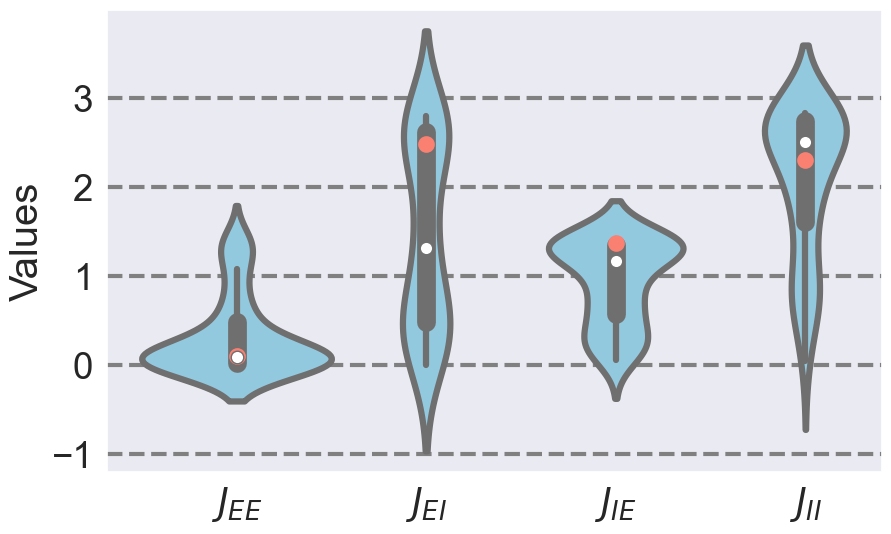

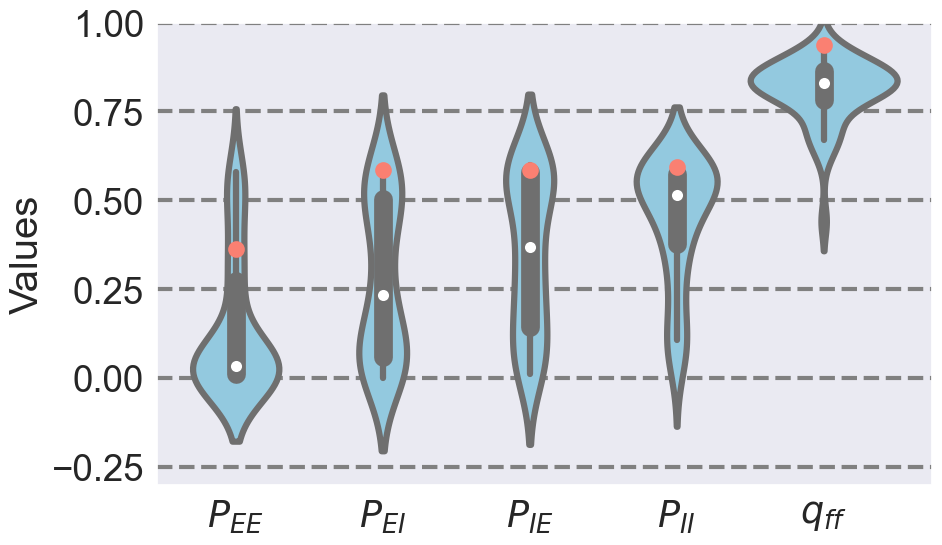

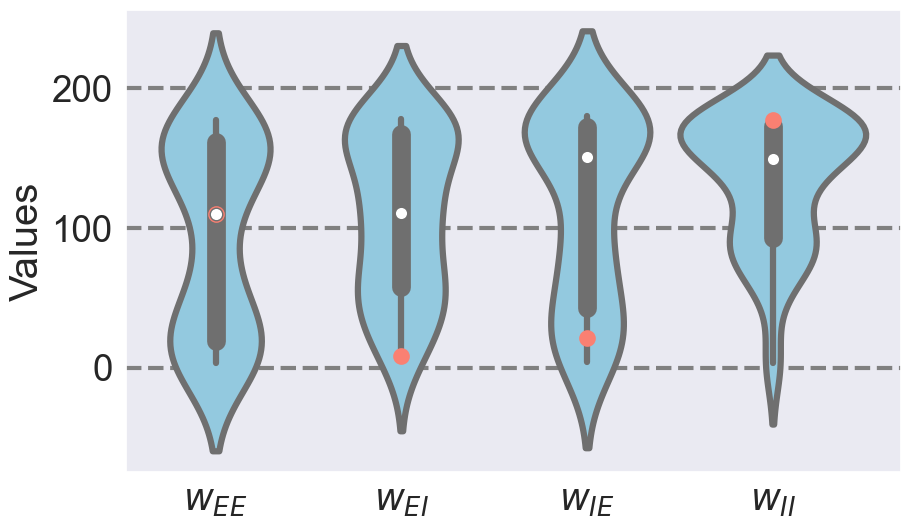

In [7]:
width = 1
linewidth = 4.5
linewidth_grid = 3

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$J_{EE}$", "$J_{EI}$", "$J_{IE}$", "$J_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
for i, ground_truth in enumerate(J_array):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$P_{EE}$", "$P_{EI}$", "$P_{IE}$", "$P_{II}$", "$q_{ff}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
for i, ground_truth in enumerate(P_array):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.ylim(-0.3,1)
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$w_{EE}$", "$w_{EI}$", "$w_{IE}$", "$w_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
for i, ground_truth in enumerate(w_array):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

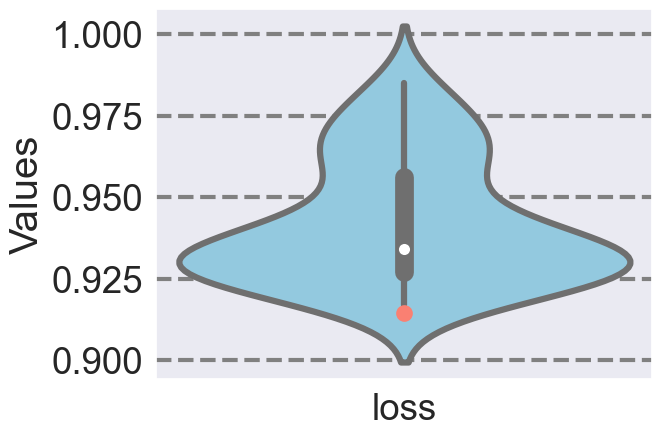

In [8]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.9143538475036621]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=linewidth_grid)
plt.xlabel('')
plt.ylabel('Values')
plt.show()